In [1]:
!pip install xgboost

In [2]:
import xgboost as xgb

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
dataset=pd.read_csv("insurance_pre.csv")
dataset

,age,sex,bmi,children,smoker,charges
0,19,female,27.900,0,yes,16884.92400
1,18,male,33.770,1,no,1725.55230
2,28,male,33.000,3,no,4449.46200
3,33,male,22.705,0,no,21984.47061
4,32,male,28.880,0,no,3866.85520
...,...,...,...,...,...,...
1333,50,male,30.970,3,no,10600.54830
1334,18,female,31.920,0,no,2205.98080
1335,18,female,36.850,0,no,1629.83350
1336,21,female,25.800,0,no,2007.94500


In [23]:
dataset.shape          #shape key word is ude for no.of rows and no.of coloum in the given dataset

(1338, 6)

In [24]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 6 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(2)
memory usage: 62.8+ KB


In [25]:
dataset=pd.get_dummies(dataset,drop_first=True)
dataset

,age,bmi,children,charges,sex_male,smoker_yes
0,19,27.900,0,16884.92400,0,1
1,18,33.770,1,1725.55230,1,0
2,28,33.000,3,4449.46200,1,0
3,33,22.705,0,21984.47061,1,0
4,32,28.880,0,3866.85520,1,0
...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0
1334,18,31.920,0,2205.98080,0,0
1335,18,36.850,0,1629.83350,0,0
1336,21,25.800,0,2007.94500,0,0


In [26]:
indep=dataset[['age', 'bmi', 'children','sex_male', 'smoker_yes']]
dep=dataset[['charges']]

In [27]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(indep,dep,test_size=0.30,random_state=0)

In [46]:
xg_reg=xgb.XGBRegressor(objective="reg:squarederror", colsample_bytree=0.3,
                        learning_rate=0.1, max_depth=5,
                        alpha=10, n_estimator=10)
xg_reg.fit(x_train,y_train)

[19:28:57] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.3,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimator=10,
             n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', predictor='auto', ...)

In [47]:
y_pred=xg_reg.predict(x_test)

In [48]:
from sklearn.metrics import r2_score
r_score=r2_score(y_pred,y_test)

In [49]:
r_score

0.2546338484816837

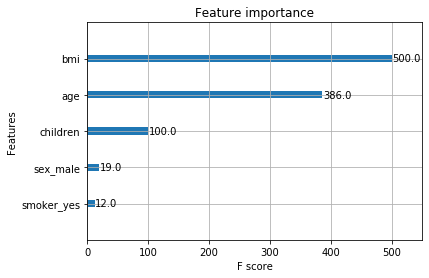

In [45]:
xgb.plot_importance(xg_reg)